In [12]:
import query
import matplotlib.pyplot as plt
import numpy

In [7]:
df = query.load_dataframe()

DataFrame loaded from 'extended_data_table_2.csv'.


In [8]:
df.columns

Index(['Star', 'LD', 'σLD', 'V', 'σV', 'K', 'E(B-V)', 'Sv', 'σSv', 'RA_SIMBAD',
       'DEC_SIMBAD', 'RA_Gaia', 'DEC_Gaia', 'phot_g_mean_mag',
       'phot_bp_mean_mag', 'phot_rp_mean_mag', 'parallax', 'parallax_error'],
      dtype='object')

In [ ]:
df['distance'] = 1000 / df['parallax'] # parsec
df['distance_err'] = df['parallax_error'] / df['parallax'] * df['distance']  # parsec
df['SB_rp'] = df['phot_rp_mean_mag'] + 2.5 * numpy.log10(numpy.pi * (df['LD']/2)**2)
df['SB_rp_err'] = numpy.sqrt(df['V']**2 + (5 / numpy.log(10) * df['σLD'] / df['LD'])**2)
df['SB_V'] = df['phot_rp_mean_mag'] + 2.5 * numpy.log10(numpy.pi * (df['LD']/2)**2)
df['SB_V_err'] = numpy.sqrt(df['σV']**2 + (5 / numpy.log(10) * df['σLD'] / df['LD'])**2)

/var/folders/hr/9sdqv6450z16rzwk76fgsygw0000gn/T/ipykernel_36825/3480731120.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


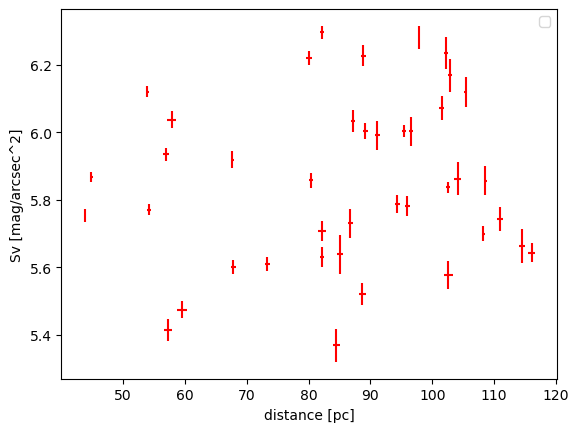

In [ ]:
plt.errorbar(df['distance'], df['Sv'] , yerr =df['σSv'], xerr= df['distance_err'],ls='none',color='red')

plt.xlabel('distance [pc]')
plt.ylabel('Sv [mag/arcsec^2]')
plt.legend()
plt.show()

/var/folders/hr/9sdqv6450z16rzwk76fgsygw0000gn/T/ipykernel_36825/1918152550.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


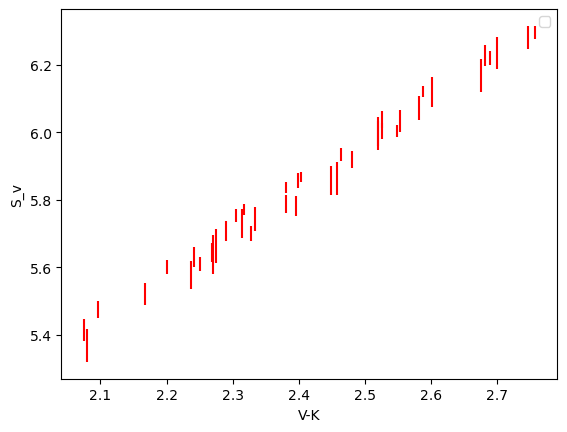

In [44]:
plt.errorbar(df['V'] - df['K'] , df['Sv']  , yerr =df['σSv'], ls='none',color='red')

plt.xlabel('V-K')
plt.ylabel('S_v')
plt.legend()
plt.show()

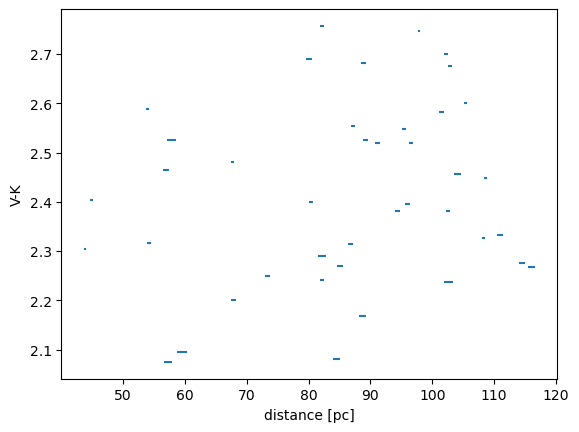

In [45]:
plt.errorbar(df['distance'], df['V'] - df['K'], xerr= df['distance_err'],ls='none')
plt.xlabel('distance [pc]')
plt.ylabel('V-K')
plt.show()

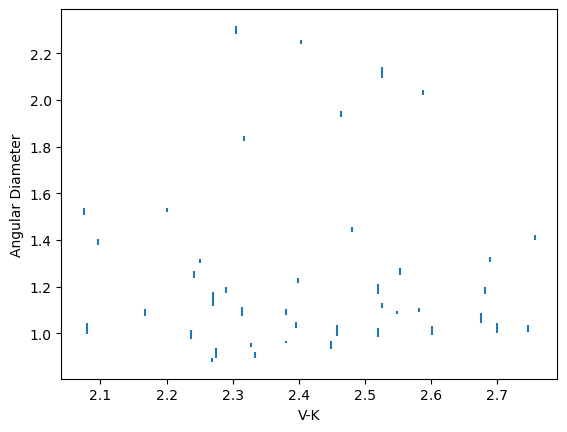

In [47]:
plt.errorbar(df['V'] - df['K'], df['LD'],  yerr= df['σLD'],ls='none')
plt.ylabel('Angular Diameter')
plt.xlabel('V-K')
plt.show()